# Wellness Tourism Package

## Context:-

* Visit With Us tourism company wants to establish a viable business model to expand its customer base

* Currently there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Over 18% of customers purchased a product from the available packages according to the data from the last year

* However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

* The company is now planning to launch a new product Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

## Objective:-
* To harness the available data of existing and potential customers and improve marketing expenditure, thus avoiding high costs

* To Predict customers more likely to purchase the newly introduced package

## Dataset Information:-

#### Customer Details:

##### Dependent Feature (y)
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

##### Independent Features(X)
* CustomerID: Unique customer ID
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are *   ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
#### Customer interaction data:
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Code:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("G:/Internship/Tour Package Project/tour_package.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [15]:
df = df.drop(columns = 'CustomerID',axis = 1)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [16]:
df.duplicated().sum()

141

In [17]:
df = df.drop_duplicates(keep = 'first',ignore_index = True)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4743,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4744,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4745,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4531 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4703 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4721 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4609 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

In [19]:
cols = df.select_dtypes(['object'])
for i in cols.columns:
    df[i] = df[i].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4531 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4501 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4703 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4721 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4609 non-null   float64 
 13  Passport                  4747 non-null   int64 

In [7]:
df.isnull().sum()

ProdTaken                     0
Age                         216
TypeofContact                25
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               138
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     60
Designation                   0
MonthlyIncome               224
dtype: int64

In [21]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Age')
missing_numerical.remove('MonthlyIncome')
missing_numerical

['ProdTaken',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [22]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [23]:
#we will replace the missing values with median income w.r.t the customer's designation
df["MonthlyIncome"] = df.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [24]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64
--------------------------------------------------


Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
--------------------------------------------------


Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
--------------------------------------------------


Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64
--------------------------------------------------


Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64
--------------------------------------------------




#### Observations:

* In the Gender column, we have an error value Fe Male. We will treat this as an data entry issue and replace it to Female.
* Self Inquiry is the most preffered in TypeofContact feature.
* 3.0 is the highest property rating
* And 1.0 is the highest value for the NumberOfChildrenVisiting column.
* Hence we will replace the missing values in the above columns accordingly

In [25]:
#treating missing values in categorical variables
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(1.0)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

df.Gender = df.Gender.replace('Fe Male','Female') #treating error

In [26]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [27]:
df.describe(include="category").T

,count,unique,top,freq
TypeofContact,4747,2,Self Enquiry,3375
Occupation,4747,4,Salaried,2293
Gender,4747,2,Male,2835
ProductPitched,4747,5,Basic,1800
MaritalStatus,4747,4,Married,2279
Designation,4747,5,Executive,1800


### Exploratory Data Analysis

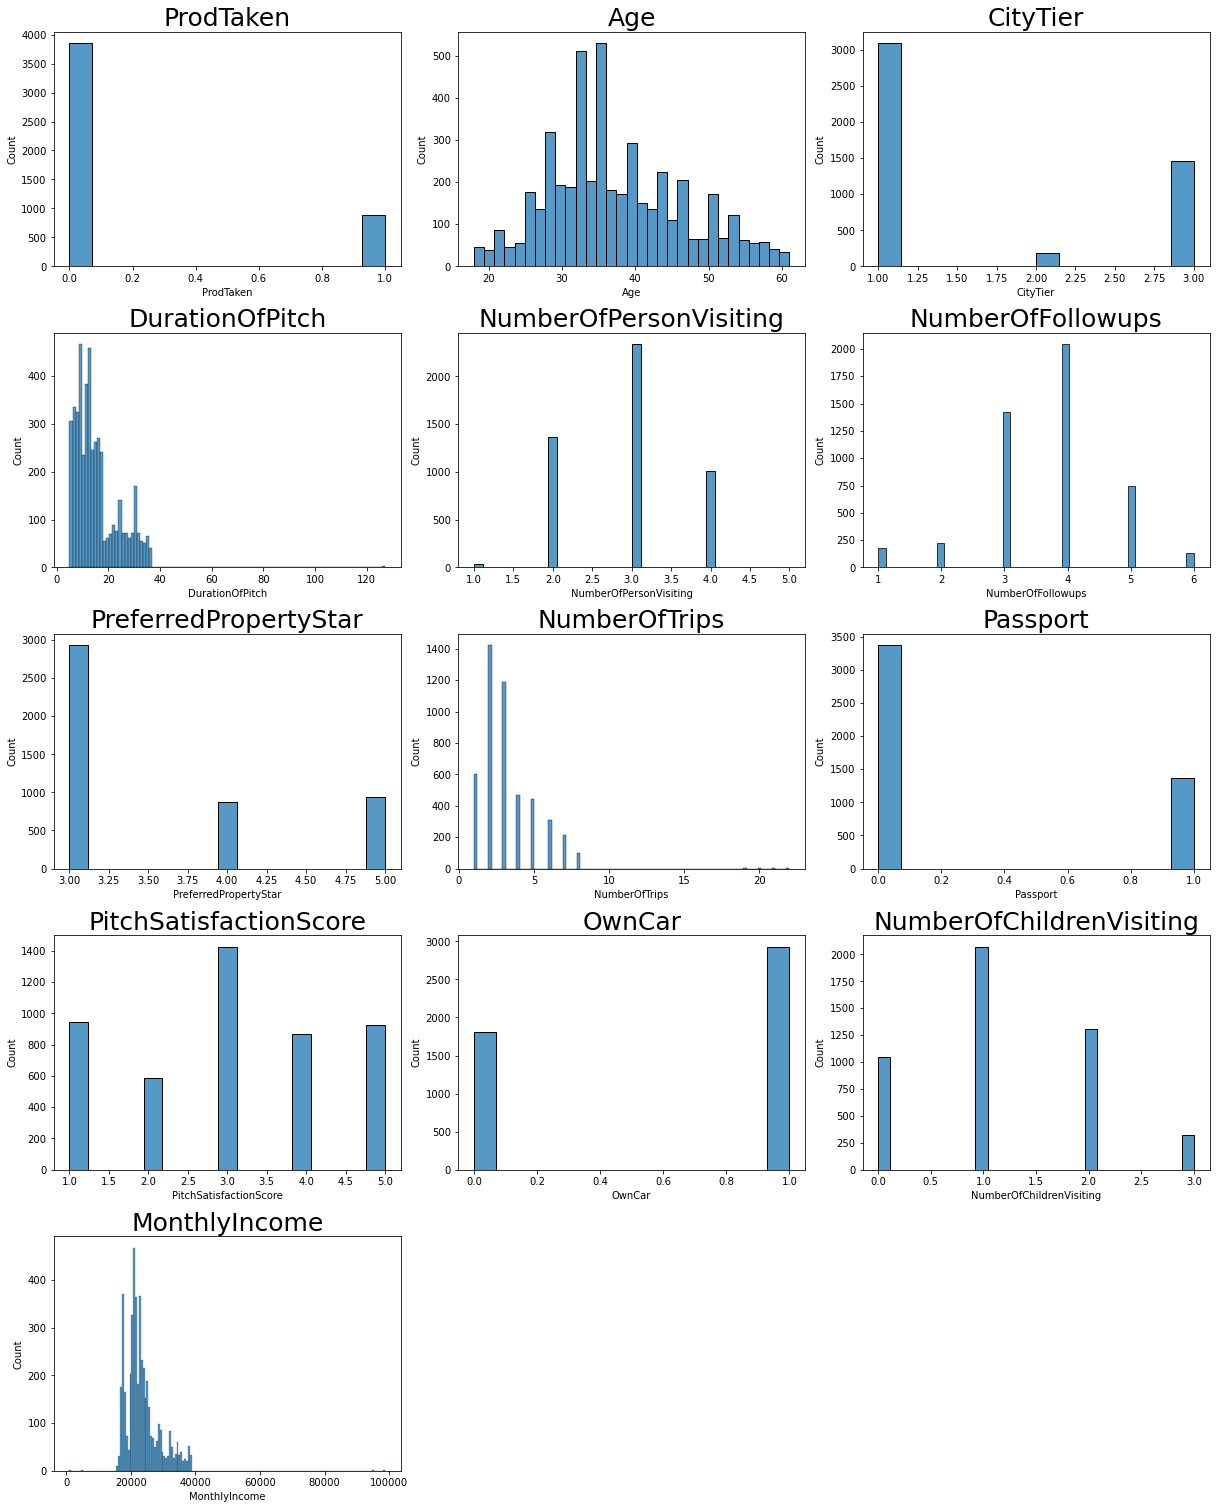

In [28]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

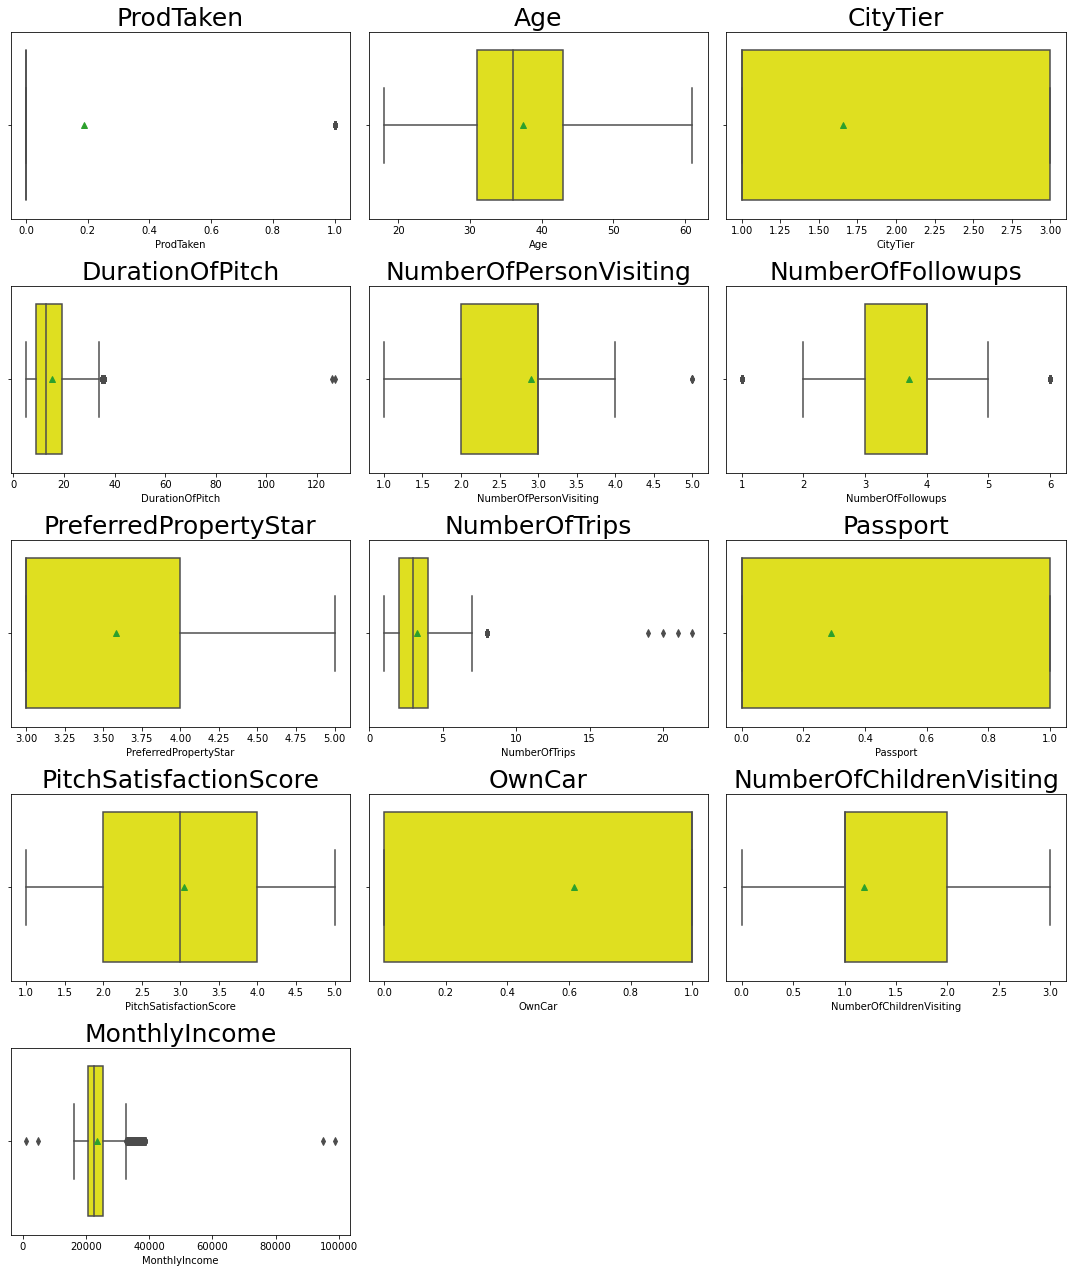

In [29]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

#### Observations:

* Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.
* DurationofPitch is slightly right-skewed. We see that most customer's pitch duration was under 20 mins. We also see few outliers at 40 mins and at 120+ mins.
* The highest number of followups is 4.0 followed by 3.0.
* NumberofTrips is right-skwed a little and majority of the customers seem to take atleast 3 trips per year. We also see very few outliers in the higher end
* MonthlyIncome is also right-skewd. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. We also see two outliers in the low end and on the highest end. 
* There are several outliers after the approx 35K dollars income level.

In [30]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

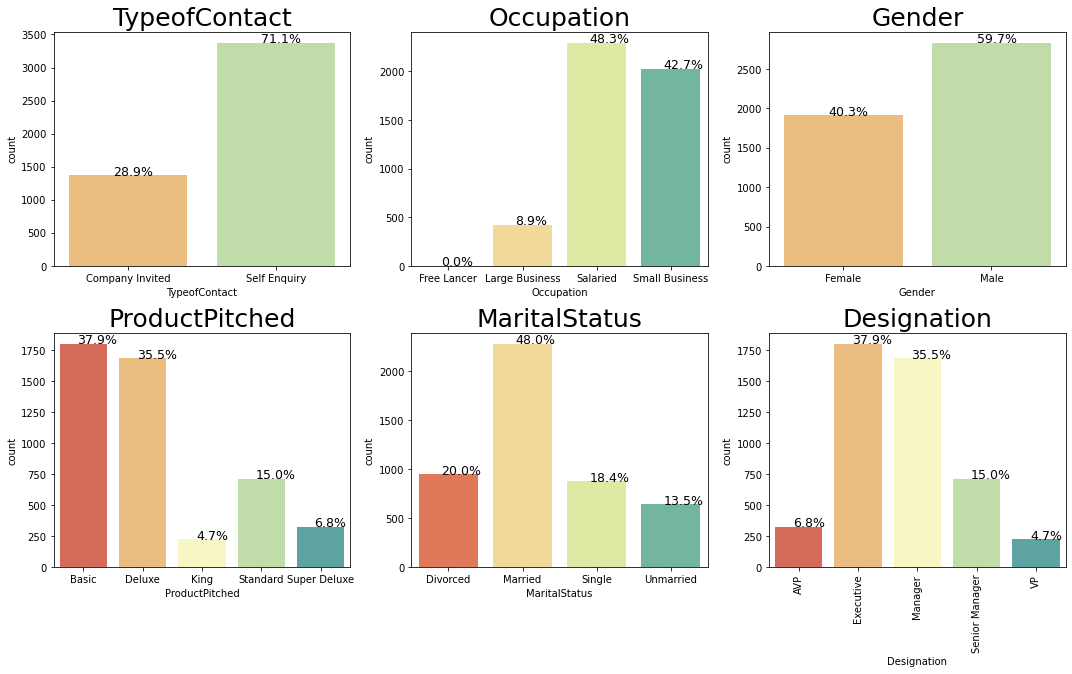

In [31]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.xticks(rotation=90)
plt.show()

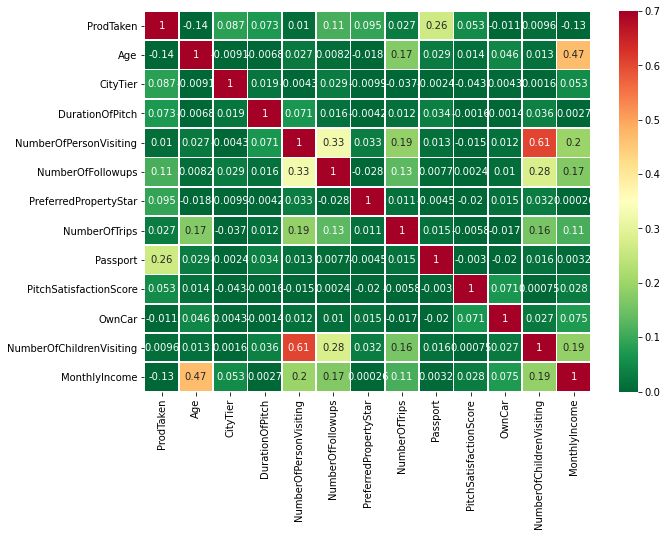

In [32]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

#### Observations:

* The correlation values are quite low between all the variables.
* Only Age and DurationofPitch have a very low negative correlation.
* MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome
* NumberofFollowups and NumberofTrips have a moderate positive correlation between them and also individually with Monthly Income.

In [34]:
#Stacked plot of categorical variables with Personal Loans
def stacked_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1078  294  1372
Self Enquiry     2775  600  3375
All              3853  894  4747
------------------------------------------------------------------------------------------------------------------------


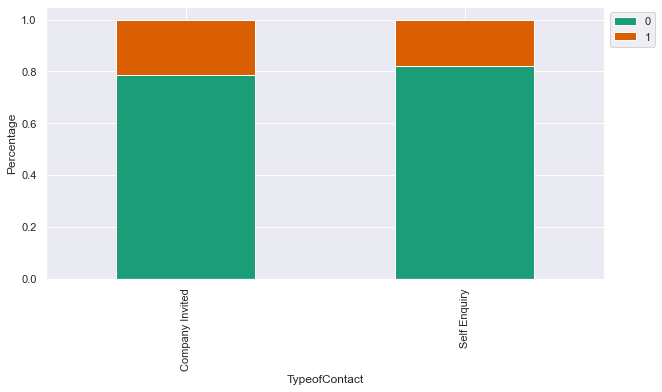

In [35]:
stacked_plot(df.TypeofContact)

ProdTaken     0    1   All
CityTier                  
1          2592  506  3098
2           146   42   188
3          1115  346  1461
All        3853  894  4747
------------------------------------------------------------------------------------------------------------------------


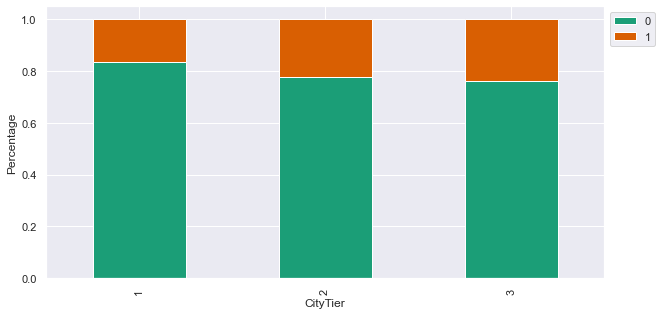

In [36]:
stacked_plot(df.CityTier)

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   306  118   424
Salaried        1893  400  2293
Small Business  1654  374  2028
All             3853  894  4747
------------------------------------------------------------------------------------------------------------------------


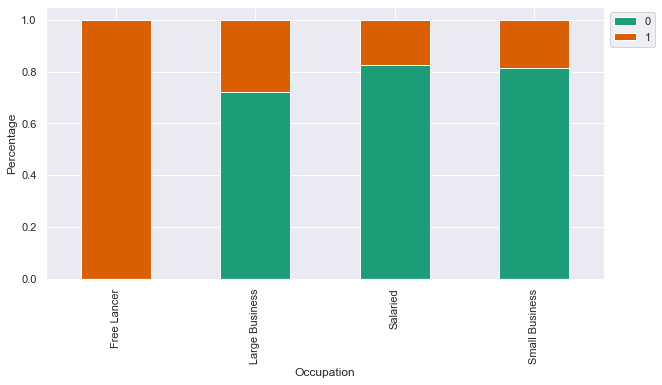

In [37]:
stacked_plot(df.Occupation)

ProdTaken     0    1   All
Gender                    
Female     1580  332  1912
Male       2273  562  2835
All        3853  894  4747
------------------------------------------------------------------------------------------------------------------------


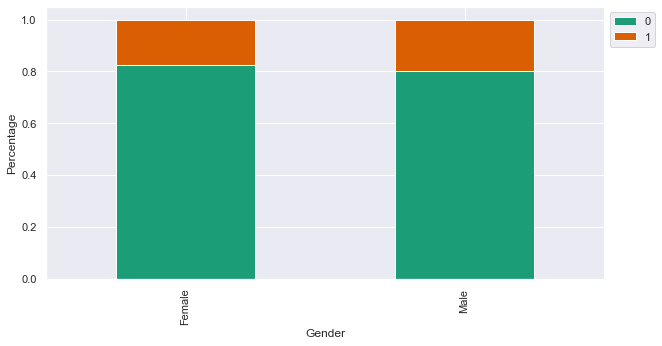

In [38]:
stacked_plot(df.Gender)

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         35    0    35
2                       1108  256  1364
3                       1889  447  2336
4                        818  191  1009
5                          3    0     3
All                     3853  894  4747
------------------------------------------------------------------------------------------------------------------------


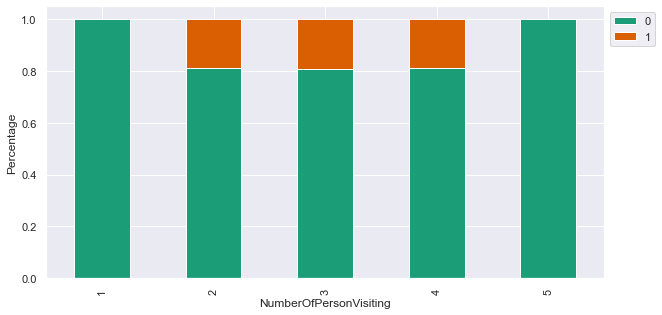

In [39]:
stacked_plot(df.NumberOfPersonVisiting)

ProdTaken          0    1   All
ProductPitched                 
Basic           1260  540  1800
Deluxe          1486  198  1684
King             205   20   225
Standard         594  120   714
Super Deluxe     308   16   324
All             3853  894  4747
------------------------------------------------------------------------------------------------------------------------


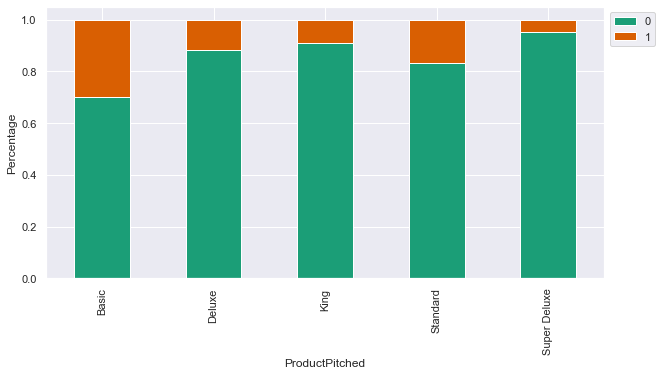

In [40]:
stacked_plot(df.ProductPitched)

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2455  476  2931
4.0                     702  176   878
5.0                     696  242   938
All                    3853  894  4747
------------------------------------------------------------------------------------------------------------------------


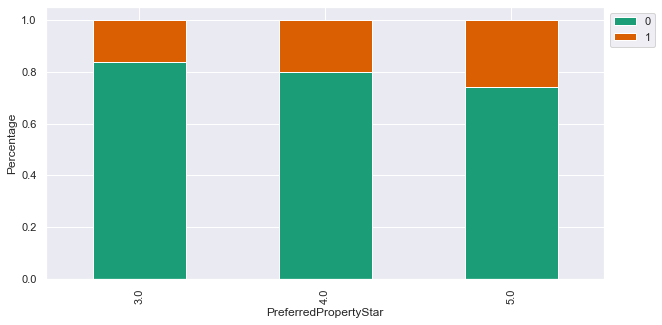

In [41]:
stacked_plot(df.PreferredPropertyStar)

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
All            3853  894  4747
------------------------------------------------------------------------------------------------------------------------


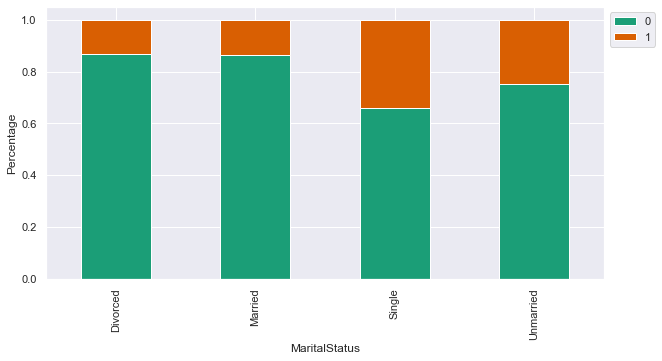

In [42]:
stacked_plot(df.MaritalStatus)

ProdTaken     0    1   All
Passport                  
0          2958  414  3372
1           895  480  1375
All        3853  894  4747
------------------------------------------------------------------------------------------------------------------------


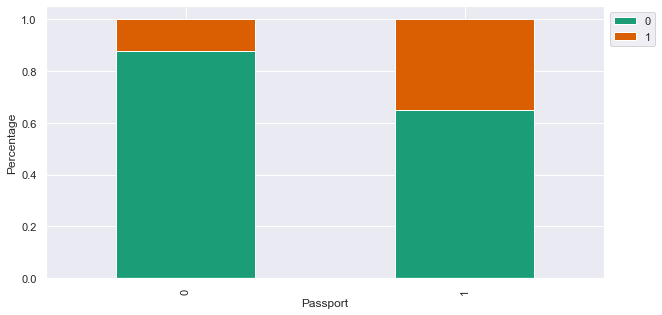

In [43]:
stacked_plot(df.Passport)

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1123  304  1427
4                        709  160   869
5                        725  198   923
All                     3853  894  4747
------------------------------------------------------------------------------------------------------------------------


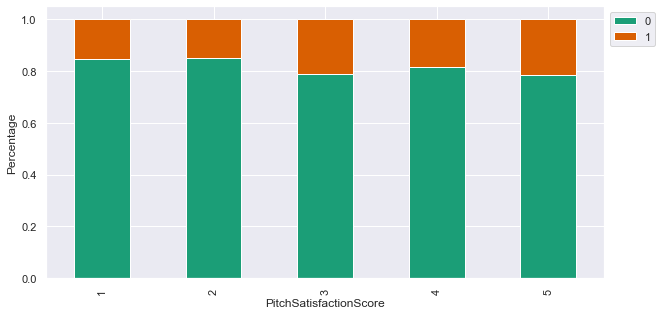

In [44]:
stacked_plot(df.PitchSatisfactionScore)

ProdTaken     0    1   All
OwnCar                    
0          1463  352  1815
1          2390  542  2932
All        3853  894  4747
------------------------------------------------------------------------------------------------------------------------


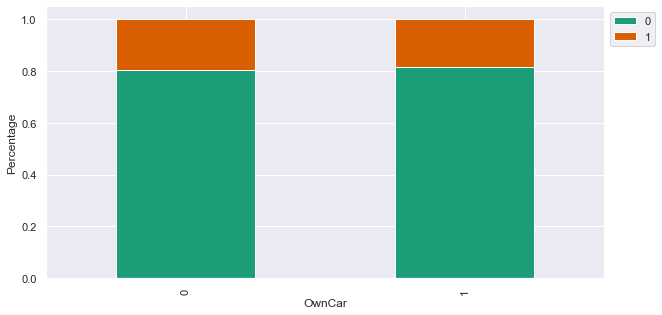

In [45]:
stacked_plot(df.OwnCar)

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        851  194  1045
1.0                       1688  386  2074
2.0                       1056  248  1304
3.0                        258   66   324
All                       3853  894  4747
------------------------------------------------------------------------------------------------------------------------


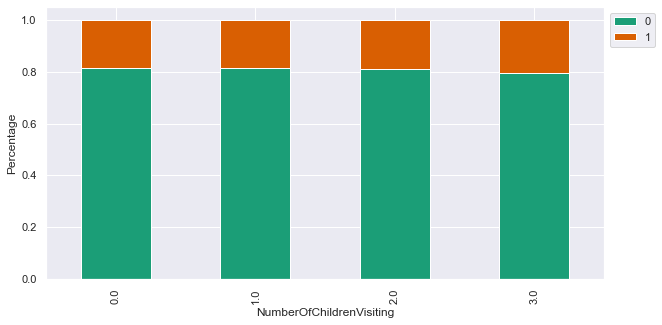

In [46]:
stacked_plot(df.NumberOfChildrenVisiting)

ProdTaken          0    1   All
Designation                    
AVP              308   16   324
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
All             3853  894  4747
------------------------------------------------------------------------------------------------------------------------


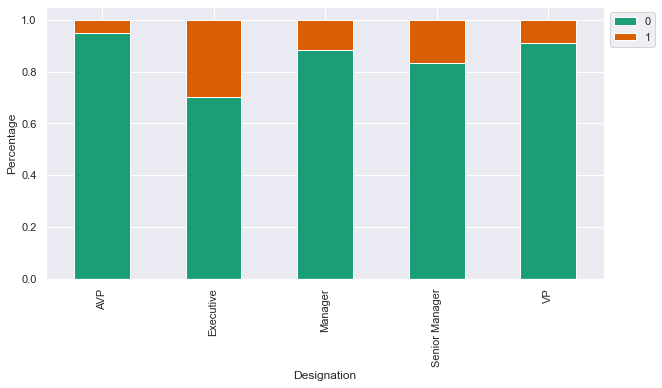

In [47]:
stacked_plot(df.Designation)

In [50]:
#Let's find the percentage of outliers using IQR

In [49]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [51]:
outlier_num = df.select_dtypes(include=np.number)

In [52]:
((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

ProdTaken                   18.832947
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.275121
NumberOfPersonVisiting       0.063198
NumberOfFollowups            6.530440
PreferredPropertyStar        0.000000
NumberOfTrips                2.232989
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.710133
dtype: float64

In [144]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=1.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='gist_heat_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
#Defining a function to calculate all the metric scores for the model
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

#### We want to predict the customers who will purchase the newly introduced travel package. Hence the Customer Interaction Data for the previous existing travel packages will not add any information to the models. So we will be dropping them for further model building and analysis process.

In [55]:
X= df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= df['ProdTaken']

In [56]:
X = pd.get_dummies(X, drop_first=True)
# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)
print(X_train.shape,X_test.shape)

(3322, 21) (1425, 21)


In [57]:
y.value_counts(1)

0    0.811671
1    0.188329
Name: ProdTaken, dtype: float64

In [58]:
y_test.value_counts(1)

0    0.81193
1    0.18807
Name: ProdTaken, dtype: float64

#### Desicion Tree

In [59]:
Dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25)

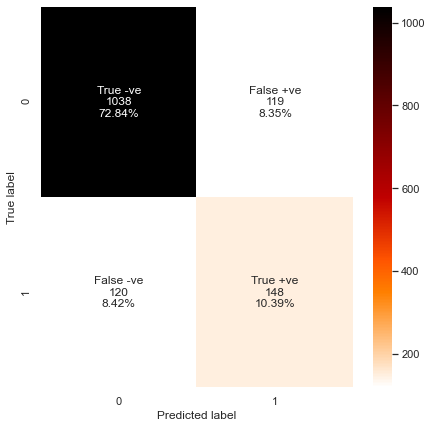

In [145]:
Dt.fit(X_train, y_train) #fit the train set to Decision tree
y_predict = Dt.predict(X_test) 
make_confusion_matrix(y_test,y_predict) #calculate confusion matrix

In [61]:
scores(Dt) #calculate the metric scores

Accuracy on training set :  1.0
Accuracy on test set :  0.832280701754386

Recall on training set :  1.0
Recall on test set :  0.5522388059701493

Precision on training set :  1.0
Precision on test set :  0.5543071161048689

F1 on training set :  1.0
F1 on test set :  0.5532710280373833


#### Bagging Classifier:

In [62]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=25)

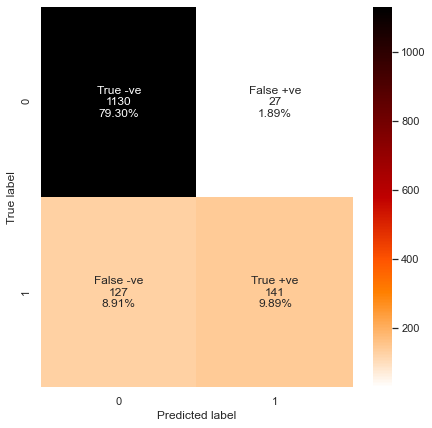

In [146]:
y_predict = bagging.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [64]:
scores(bagging)

Accuracy on training set :  0.9900662251655629
Accuracy on test set :  0.8919298245614035

Recall on training set :  0.950479233226837
Recall on test set :  0.5261194029850746

Precision on training set :  0.9966499162479062
Precision on test set :  0.8392857142857143

F1 on training set :  0.9730171708912511
F1 on test set :  0.646788990825688


#### Bagging Classifier with weighted decision tree

In [65]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25),random_state=25)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=25),
                  random_state=25)

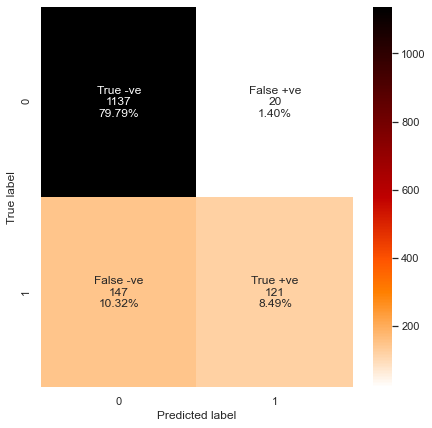

In [147]:
y_predict = bagging_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [67]:
scores(bagging_wt)

Accuracy on training set :  0.9900662251655629
Accuracy on test set :  0.8828070175438596

Recall on training set :  0.9472843450479234
Recall on test set :  0.45149253731343286

Precision on training set :  1.0
Precision on test set :  0.8581560283687943

F1 on training set :  0.9729286300246104
F1 on test set :  0.5916870415647922


#### Random Forest Classifier

In [68]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

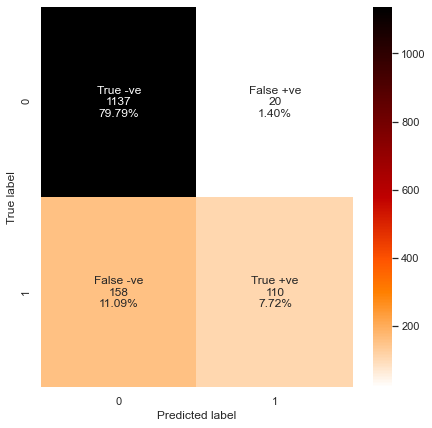

In [148]:
y_predict = random_forest.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [70]:
scores(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.8750877192982456

Recall on training set :  1.0
Recall on test set :  0.41044776119402987

Precision on training set :  1.0
Precision on test set :  0.8461538461538461

F1 on training set :  1.0
F1 on test set :  0.5527638190954774


#### Random Forest Classifier with weights

In [71]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

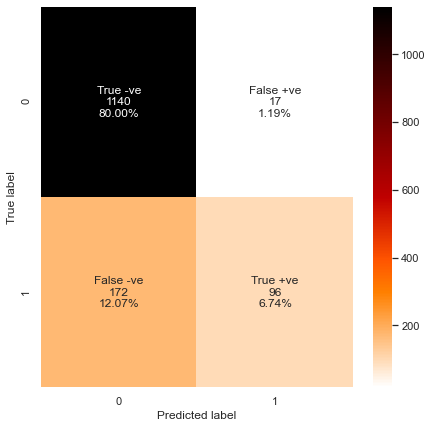

In [149]:
y_predict = random_forest_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [73]:
scores(random_forest_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8673684210526316

Recall on training set :  1.0
Recall on test set :  0.3582089552238806

Precision on training set :  1.0
Precision on test set :  0.8495575221238938

F1 on training set :  1.0
F1 on test set :  0.5039370078740157


#### Hyperparameter Tuning of the model

* For Decision Tree Model

In [74]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                       random_state=25)

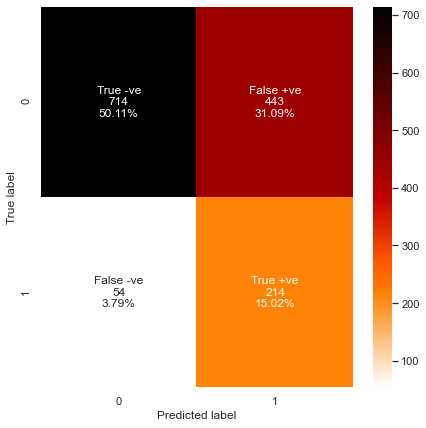

In [150]:
y_predict = classifier.predict(X_test) 
make_confusion_matrix(y_test,y_predict) 

In [76]:
scores(classifier)

Accuracy on training set :  0.6393738711619507
Accuracy on test set :  0.6512280701754386

Recall on training set :  0.8178913738019169
Recall on test set :  0.7985074626865671

Precision on training set :  0.3208020050125313
Precision on test set :  0.3257229832572298

F1 on training set :  0.4608460846084608
F1 on test set :  0.46270270270270275


* For Bagging Classifier

In [77]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25,bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

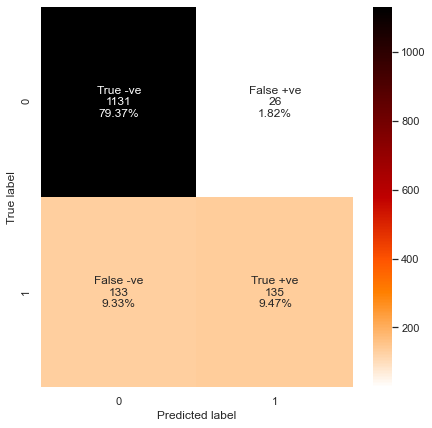

In [151]:
y_predict = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [79]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9984948826008428
Accuracy on test set :  0.888421052631579

Recall on training set :  0.9936102236421726
Recall on test set :  0.503731343283582

Precision on training set :  0.9983948635634029
Precision on test set :  0.8385093167701864

F1 on training set :  0.9959967974379504
F1 on test set :  0.6293706293706294


* For Random Forest Classifier

In [80]:
# Grid of parameters to choose from
randomforest_tuned = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=29)

parameters = {"n_estimators": np.arange(10,60,5),
              'criterion':['gini','entropy'],
            "min_samples_leaf": np.arange(5,11,1),
            "max_features":['sqrt','log2'],
            "max_samples": np.arange(0.5, 1, 0.1),
             }

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_features='sqrt', max_samples=0.8999999999999999,
                       min_samples_leaf=5, n_estimators=35, random_state=29)

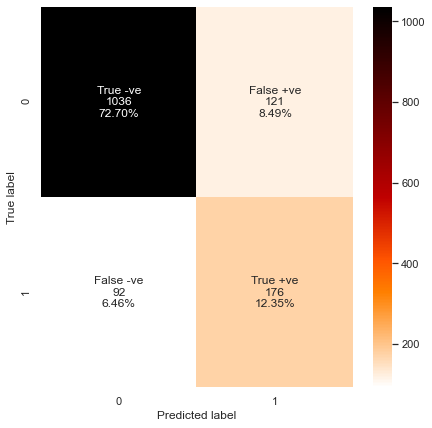

In [152]:
y_predict = rf_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [82]:
scores(rf_estimator_tuned)

Accuracy on training set :  0.9108970499698976
Accuracy on test set :  0.8505263157894737

Recall on training set :  0.9456869009584664
Recall on test set :  0.6567164179104478

Precision on training set :  0.6932084309133489
Precision on test set :  0.5925925925925926

F1 on training set :  0.7999999999999999
F1 on test set :  0.6230088495575221


#### Boosting Models

* ADA Boost Classifier

In [83]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=25)

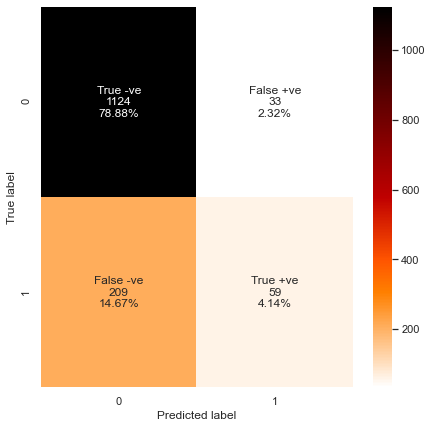

In [153]:
y_pred = Ada_boost.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [85]:
scores(Ada_boost)

Accuracy on training set :  0.8464780252859723
Accuracy on test set :  0.8301754385964912

Recall on training set :  0.3019169329073482
Recall on test set :  0.22014925373134328

Precision on training set :  0.7213740458015268
Precision on test set :  0.6413043478260869

F1 on training set :  0.4256756756756756
F1 on test set :  0.3277777777777778


* Gradient Boost Classifier

In [86]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=25)

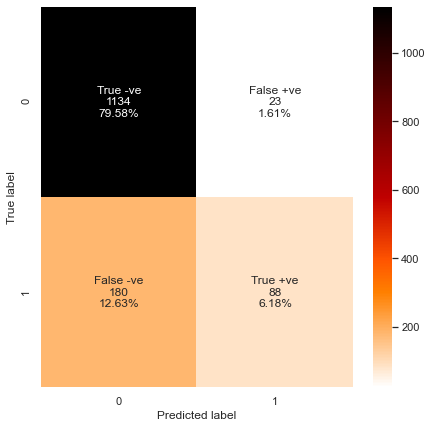

In [154]:
y_predict = Grad_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [88]:
scores(Grad_boost)

Accuracy on training set :  0.8853100541842264
Accuracy on test set :  0.8575438596491228

Recall on training set :  0.4536741214057508
Recall on test set :  0.3283582089552239

Precision on training set :  0.8792569659442725
Precision on test set :  0.7927927927927928

F1 on training set :  0.5985247629083246
F1 on test set :  0.4643799472295515


* Gradient Boost with ADABoost classifier

In [89]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),
                           random_state=25)

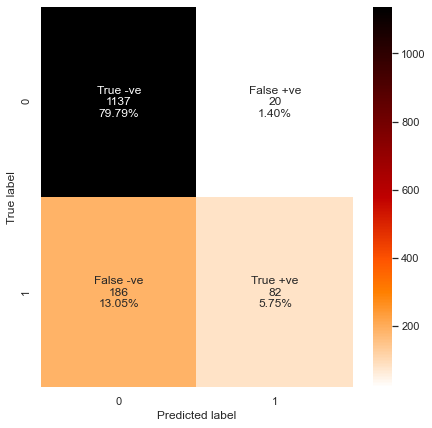

In [155]:
y_predict = Grad_boost_ada.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [91]:
scores(Grad_boost_ada)

Accuracy on training set :  0.8859121011438892
Accuracy on test set :  0.8554385964912281

Recall on training set :  0.45686900958466453
Recall on test set :  0.30597014925373134

Precision on training set :  0.88
Precision on test set :  0.803921568627451

F1 on training set :  0.601472134595163
F1 on test set :  0.4432432432432433


* XGBoost Classifier

In [92]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=25, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

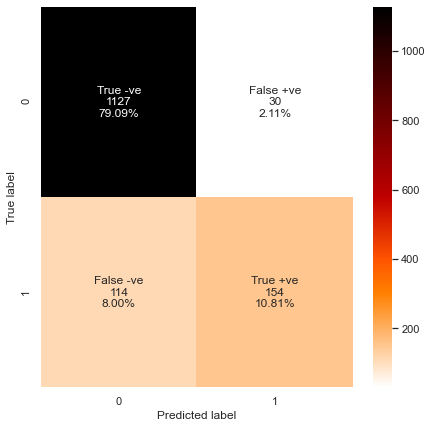

In [156]:
y_predict = XG_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [94]:
scores(XG_boost)

Accuracy on training set :  0.9957856712823601
Accuracy on test set :  0.8989473684210526

Recall on training set :  0.9776357827476039
Recall on test set :  0.5746268656716418

Precision on training set :  1.0
Precision on test set :  0.8369565217391305

F1 on training set :  0.9886914378029079
F1 on test set :  0.6814159292035399


#### Hyperparameter Tuning of the Boosting models:

* For ADABoost

In [95]:
# Choose the type of classifier. 
Ada_tuned = AdaBoostClassifier(random_state=25)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,60,10),
    'learning_rate': [0.05,0.15,0.45,0.75]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Ada_boost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.75, random_state=25)

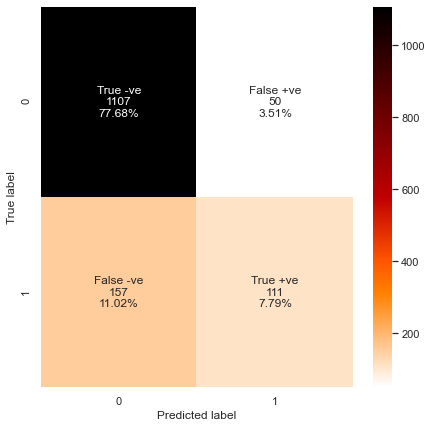

In [157]:
y_pred = Ada_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [97]:
scores(Ada_boost_tuned)

Accuracy on training set :  0.9226369656833233
Accuracy on test set :  0.8547368421052631

Recall on training set :  0.6789137380191693
Recall on test set :  0.4141791044776119

Precision on training set :  0.8835758835758836
Precision on test set :  0.6894409937888198

F1 on training set :  0.7678410117434507
F1 on test set :  0.5174825174825175


*  For GradientBoost

In [98]:
# Choose the type of classifier. 
Grad_boost_ada_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    'learning_rate': [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Grad_boost_ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Grad_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Grad_boost_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),
                           learning_rate=0.5, max_features=0.7, n_estimators=55,
                           random_state=25, subsample=0.7)

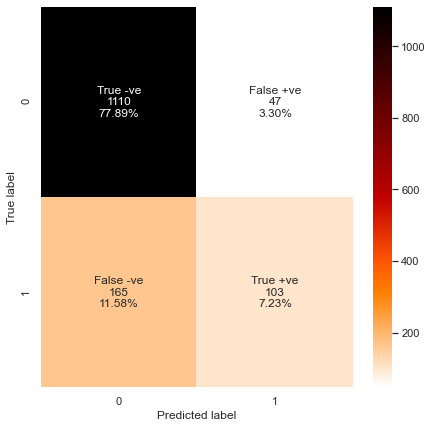

In [158]:
y_predict = Grad_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [100]:
scores(Grad_boost_tuned)

Accuracy on training set :  0.9145093317278747
Accuracy on test set :  0.8512280701754386

Recall on training set :  0.6357827476038339
Recall on test set :  0.3843283582089552

Precision on training set :  0.8766519823788547
Precision on test set :  0.6866666666666666

F1 on training set :  0.737037037037037
F1 on test set :  0.492822966507177


* For XGBoost

In [101]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.55, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=4,
              num_parallel_tree=1, random_state=25, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

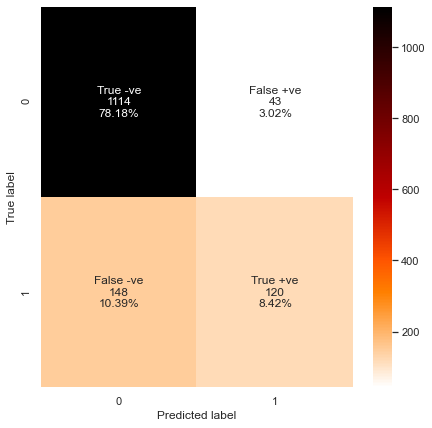

In [159]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [103]:
scores(xgb_tuned)

Accuracy on training set :  0.979530403371463
Accuracy on test set :  0.8659649122807017

Recall on training set :  0.9041533546325878
Recall on test set :  0.44776119402985076

Precision on training set :  0.9860627177700348
Precision on test set :  0.7361963190184049

F1 on training set :  0.9433333333333332
F1 on test set :  0.5568445475638052


#### Stacking Classifier :

In [106]:
estimators = [('Random Forest',rf_estimator_tuned),('ADA Boosting',Ada_boost_tuned),('Decision Tree',classifier)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       criterion='entropy',
                                                       max_features='sqrt',
                                                       max_samples=0.8999999999999999,
                                                       min_samples_leaf=5,
                                                       n_estimators=35,
                                                       random_state=29)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.75,
                                                   random_state=25)),
                               ('Dec...
  

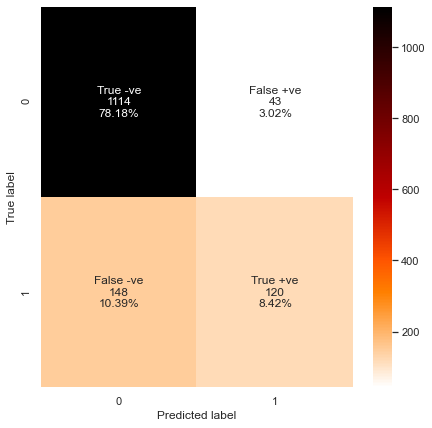

In [160]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [108]:
scores(stacking_classifier)

Accuracy on training set :  0.9226369656833233
Accuracy on test set :  0.8456140350877193

Recall on training set :  0.7955271565495208
Recall on test set :  0.4626865671641791

Precision on training set :  0.7942583732057417
Precision on test set :  0.62

F1 on training set :  0.7948922585794096
F1 on test set :  0.52991452991453


#### Comparing all Models:

In [109]:
# defining list of models
all_models = [Dt, classifier,bagging,bagging_estimator_tuned,random_forest, rf_estimator_tuned,
          Ada_boost, Ada_boost_tuned, Grad_boost, Grad_boost_tuned, XG_boost,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [110]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Tuned Bagging Classifier ',
                                          'Random Forest','Tuned Random Forest','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_F1-Score,Test_F1-Score
10,XGBoost Classifier,0.995786,0.898947,0.988691,0.681416
2,Bagging Classifier,0.990066,0.891930,0.973017,0.646789
3,Tuned Bagging Classifier,0.998495,0.888421,0.995997,0.629371
5,Tuned Random Forest,0.910897,0.850526,0.800000,0.623009
11,Tuned XGBoost Classifier,0.979530,0.865965,0.943333,0.556845
0,Decision Tree,1.000000,0.832281,1.000000,0.553271
4,Random Forest,1.000000,0.875088,1.000000,0.552764
12,Stacking Classifier,0.922637,0.845614,0.794892,0.529915
7,Tuned AdaBoost Classifier,0.922637,0.854737,0.767841,0.517483
9,Tuned Gradient Boosting Classifier,0.914509,0.851228,0.737037,0.492823


#### Feature importance of Tuned Random Forest Classifier

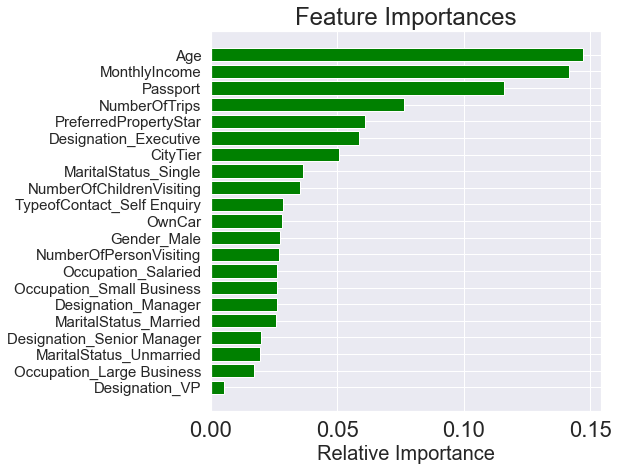

In [129]:
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], size=(15))
plt.xlabel('Relative Importance',size=(20))
plt.show()

In [112]:
scores(rf_estimator_tuned) #peformance scores for Random Forest-Tuned

Accuracy on training set :  0.9108970499698976
Accuracy on test set :  0.8505263157894737

Recall on training set :  0.9456869009584664
Recall on test set :  0.6567164179104478

Precision on training set :  0.6932084309133489
Precision on test set :  0.5925925925925926

F1 on training set :  0.7999999999999999
F1 on test set :  0.6230088495575221


### Conclusion:
* Hence Tuned Random Forest Classifier Model gives an overall generalised metric performace w.r.t F1 score and doesnt seem to be over-fitting.
* The most importance features for this model are:
    * MonthlyIncome
    * Age
    * Passport_1(Customers with Passport)
* This model has an 83% accuracy rate, which is quite good despite the imbalance in data.

### Recommendations:
* There was imbalance in data, ie only 18% of customers bought any product. This must be fixed for future analysis.
* NumberofChilden and NumberofPeoplevisiting doesnt seem to have great impact on the prediction
* The business can provide incentives or coupons for couples and those with family to encourage more sales
* The Business can target customers with Passport with special international packages, as such customers have higher buying rate.
* After identifying a potential customer, the company should pitch packages per the customer's monthly incomes.
* Young and single people are more likely to buy the offered packages. The company can offer discounts or customize the package to attract more couples, families, and customers above 30 years of age.


In [114]:
df2=df.copy() # making a new copy from the dataset
df2 = df2.drop(['PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1) 
A= df2.drop(['ProdTaken'],axis=1)
B= df2['ProdTaken']

A = pd.get_dummies(A, drop_first=True)

# Splitting data into training and test set:
A_train,A_test,B_train,B_test =train_test_split(A,B, test_size=0.3, random_state=25,stratify=y)
print(A_train.shape,A_test.shape)

(3322, 21) (1425, 21)


In [115]:
A_test.head()

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,...,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3650,38.0,3,3,4.0,3.0,0,0,2.0,22867.0,1,...,0,1,1,1,0,0,0,1,0,0
1844,56.0,3,2,5.0,1.0,0,1,0.0,28212.0,0,...,1,0,0,1,0,0,0,0,0,0
1600,51.0,1,2,3.0,3.0,0,1,0.0,25650.0,0,...,1,0,1,0,0,1,0,0,1,0
3887,28.0,3,3,3.0,3.0,0,1,1.0,27404.0,0,...,1,0,1,0,0,1,0,0,1,0
1399,43.0,1,1,3.0,2.0,0,1,0.0,22510.0,1,...,1,0,1,1,0,0,0,0,1,0


In [116]:
#running the chosen model on test set
final_pred_test = rf_estimator_tuned.predict(A_test)

In [117]:
data = df2.loc[A_test.index] #selecting rows with same index as test set
data['Predicted'] = final_pred_test
data.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Predicted
3650,0,38.0,Self Enquiry,3,Small Business,Male,3,4.0,Married,3.0,0,0,2.0,Manager,22867.0,0
1844,0,56.0,Company Invited,3,Salaried,Female,2,5.0,Married,1.0,0,1,0.0,AVP,28212.0,0
1600,1,51.0,Company Invited,1,Salaried,Male,2,3.0,Unmarried,3.0,0,1,0.0,Senior Manager,25650.0,0
3887,0,28.0,Company Invited,3,Salaried,Male,3,3.0,Unmarried,3.0,0,1,1.0,Senior Manager,27404.0,0
1399,0,43.0,Self Enquiry,1,Salaried,Male,1,3.0,Married,2.0,0,1,0.0,Senior Manager,22510.0,0


In [118]:
comparison_column = np.where(data["Predicted"] == data["ProdTaken"], True, False) #identifying the misclassification
data['Misclassification'] = comparison_column
data['Misclassification'].value_counts()

True     1212
False     213
Name: Misclassification, dtype: int64

In [119]:
incorrect =data[data['Misclassification']== False] # Grouping only the misidentified rows 
incorrect

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Predicted,Misclassification
1600,1,51.0,Company Invited,1,Salaried,Male,2,3.0,Unmarried,3.0,0,1,0.0,Senior Manager,25650.0,0,False
3210,1,30.0,Self Enquiry,3,Salaried,Female,3,5.0,Divorced,3.0,0,0,1.0,Senior Manager,26014.0,0,False
3242,0,29.0,Self Enquiry,1,Small Business,Male,4,5.0,Divorced,3.0,0,1,3.0,Executive,21874.0,1,False
3776,0,32.0,Self Enquiry,1,Small Business,Female,3,3.0,Married,3.0,1,1,1.0,Executive,19807.0,1,False
1907,0,24.0,Company Invited,3,Small Business,Male,2,3.0,Married,1.0,0,1,1.0,Executive,17400.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0,31.0,Company Invited,3,Salaried,Male,2,5.0,Single,1.0,0,0,0.0,Manager,20332.0,1,False
256,0,42.0,Self Enquiry,1,Small Business,Female,2,5.0,Married,1.0,1,1,0.0,Executive,17593.0,1,False
2443,1,37.0,Self Enquiry,1,Small Business,Male,4,3.0,Divorced,2.0,1,0,2.0,Executive,22066.0,0,False
3826,1,51.0,Company Invited,3,Salaried,Male,4,3.0,Married,2.0,0,1,2.0,Manager,25406.0,0,False


#### Misclassification Patterns on Customers

* About 16% of data from test set has been misclassified.
* The pattern seems to be distributed across all the variables but is significant in some
* Customers between ages 30-40 yrs with MonthlyIncome of 20-35K dollars are highly misidentified.
* Salaried and Small Business Occupation plus Executives,Manager and Sr.Manager by Designation are also significant.
* Married Customers and those planing to bring atleast one Child are also high
* Even though, customer with Passport were considered an important feature, the misidentification is equal in the Passport variable.